# **Simple Data Analysis on the Latest United Rugby Championship Standings**

The United Rugby Championship is a global club rugby league where 16 teams from five powerhouse nations compete across two hemispheres to become the URC champion. The URC is made up of four teams from Ireland, four from South Africa, four from Wales, two from Italy and two from Scotland for more information check out [URC Championship Website](https://www.unitedrugby.com/about).

In this notebook, I attempt to perform some simple data analysis on the latest URC standings as of 1st of January 2025.
The data used in this notebook is from [BBC Sports](https://www.bbc.com/sport/rugby-union/pro-tournament/table).

We shall utilize the use of webscraping libraries such as request and BeautifulSoup to extract the data from the website and perform our analysis.

### 1. Importing the Necessary Libraries

In [289]:
import requests
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from bs4 import BeautifulSoup
import numpy as np
from scipy import stats

### 2. Data Collection

In [46]:
url ='https://www.rugbypass.com/super-rugby/standings/'

In [47]:
response = requests.get(url)
response.status_code

200

In [48]:
url2 = response.text

In [49]:
soup = BeautifulSoup(url2, 'html')

In [70]:
pretty = soup.prettify()
#print(pretty)

In [56]:
#find table
table = soup.find('div', class_="comp-copy").text.strip()
table

'Get up to speed with all of the latest Super Rugby Pacific standings right here at RugbyPass. From the first kick to the final try, our rugby gurus are ready to document every point, win, loss and draw. Whether you’re here to track the current leaders or calculate your team’s chance of victory, scroll down for the latest Super Rugby Pacific standings.'

In [40]:
#print(table[0])

In [57]:
url3 = 'https://www.bbc.com/sport/rugby-union/pro-tournament/table'

In [58]:
response = requests.get(url3)
response.status_code

200

In [137]:
urlt = response.text

In [139]:
soup = BeautifulSoup(urlt, 'html.parser')

In [140]:
pretty2 = soup.prettify()
print(pretty2)

<!DOCTYPE html>
<html class="no-js" lang="en-GB">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title data-rh="true">
   United Rugby Championship Table - Rugby Union - BBC Sport
  </title>
  <meta content="Find out which rugby union teams are leading the pack or at the foot of the table in the United Rugby Championship on BBC Sport" data-rh="true" name="description"/>
  <meta content="#FFFFFF" data-rh="true" name="theme-color"/>
  <meta content="Find out which rugby union teams are leading the pack or at the foot of the table in the United Rugby Championship on BBC Sport" data-rh="true" property="og:description"/>
  <meta content="https://static.files.bbci.co.uk/core/website/assets/static/sport/bbc-sport-logo.0da9386782224b380455.png" data-rh="true" property="og:image"/>
  <meta content="BBC Sport" data-rh="true" property="og:site_name"/>
  <meta content="United Rugby Championship Table - Rugby Union - BBC Sport" data-rh="

In [267]:
# Retrieve the table from the website
table = soup.find_all('table', class_ ="ssrcss-jsg8ev-TableWrapper e1icz102" )[0]
table

<table aria-label="United Rugby Championship Table" class="ssrcss-jsg8ev-TableWrapper e1icz102"><thead class="ssrcss-mtrp4k-TableHead e1icz101"><tr><th class="ssrcss-1jdu2ly-StyledTableHeading ep4g78u0" scope="col"><span class="visually-hidden ssrcss-1f39n02-VisuallyHidden e16en2lz0">Rank</span><span aria-hidden="true"></span></th><th class="ssrcss-18x9vej-StyledTableHeading ep4g78u0" scope="col"><span aria-hidden="false">Team</span></th><th class="ssrcss-1h8p4oo-StyledTableHeading ep4g78u0" scope="col"><span aria-hidden="false">Played</span></th><th class="ssrcss-hneb3z-StyledTableHeading ep4g78u0" scope="col"><span class="visually-hidden ssrcss-1f39n02-VisuallyHidden e16en2lz0">Played</span><span aria-hidden="true">P</span></th><th class="ssrcss-1dmui1x-StyledTableHeading ep4g78u0" scope="col"><span aria-hidden="false">Won</span></th><th class="ssrcss-cbzx34-StyledTableHeading ep4g78u0" scope="col"><span class="visually-hidden ssrcss-1f39n02-VisuallyHidden e16en2lz0">Won</span><span 

In [268]:
#Retrieve the column heads from the table
table_head = table.find_all('span', {'aria-hidden': 'false'})
title = [title.text for title in table_head]
title

['Team', 'Played', 'Won', 'Lost', 'Drawn', 'For', 'Against', 'Bonus', 'Points']

Now that we have our column heads, we shall proceed to extract the values  in our rows that will populate our columns. This content is contained within the *tbody* part of our table structure. We shall use <code>find_all</code> to retrieve the body then iter through each row to retrieve the cell contents and save that to a list for each column.

In [244]:
body = table.find_all('tbody')
body

[<tbody><tr class="ssrcss-dhlz6k-TableRowBody e1icz100"><td class="ssrcss-fvkmzs-StyledTableData ef9ipf1"><div class="ssrcss-1yl2exm-CellWrapper ef9ipf0" value="[object Object]"><span class="visually-hidden ssrcss-1f39n02-VisuallyHidden e16en2lz0">1</span><span aria-hidden="true">1</span></div></td><td class="ssrcss-fvkmzs-StyledTableData ef9ipf1"><div class="ssrcss-qg0qvg-CellWrapper ef9ipf0" value="Leinster"><div class="ssrcss-1xmhex-TeamTableCellWrapper e1sk6csp3" data-team-id="urn:bbc:sportsdata:rugby-union:team:leinster"><div class="ssrcss-7kfmgb-BadgeContainer ezmsq4q1" data-testid="badge-container-urn:bbc:sportsdata:rugby-union:team:leinster"><img alt="" aria-hidden="true" class="ssrcss-1knyx38-BadgeImage ezmsq4q0" data-testid="badge-img-urn:bbc:sportsdata:rugby-union:team:leinster" src="https://static.files.bbci.co.uk/core/website/assets/static/sport/rugby-union/leinster.ba949ad7fd550015cff0.svg"/></div><a class="ssrcss-nefezf-SignpostLink ehuptrk1" href="/sport/rugby-union/tea

In [266]:
#Here we attempt to retrieve data from each row cell and save the data to a list. The data will then be used to populate our dataframe
team2 = []
pos = []
plyd = []
win = []
lose = []
draw = []
for1 = []
vs = []
pts_dif = []
bon = []
point = []
for team in table.find_all('tbody'):
    rows = team.find_all('tr')
    for row in rows:
        rug_team = row.find('div', class_="ssrcss-1m4x485-DesktopWidthOnly e1sk6csp2").text
        team2.append(rug_team)
        
        position = row.find_all('span', "visually-hidden ssrcss-1f39n02-VisuallyHidden e16en2lz0")[0].text
        pos.append(position)
        
        played = row.find_all('span', "visually-hidden ssrcss-1f39n02-VisuallyHidden e16en2lz0")[1].text
        plyd.append(played)
        
        won = row.find_all('span', "visually-hidden ssrcss-1f39n02-VisuallyHidden e16en2lz0")[3].text
        win.append(won)
        
        lost = row.find_all('span', "visually-hidden ssrcss-1f39n02-VisuallyHidden e16en2lz0")[5].text
        lose.append(lost)
        
        drawn = row.find_all('span', "visually-hidden ssrcss-1f39n02-VisuallyHidden e16en2lz0")[7].text
        draw.append(drawn)
        
        forg = row.find_all('span', "visually-hidden ssrcss-1f39n02-VisuallyHidden e16en2lz0")[9].text
        for1.append(forg)
        
        against = row.find_all('span', "visually-hidden ssrcss-1f39n02-VisuallyHidden e16en2lz0")[10].text
        vs.append(against)
        
        diff_pts = row.find_all('span', "visually-hidden ssrcss-1f39n02-VisuallyHidden e16en2lz0")[-4].text.replace('minus', '-')
        pts_dif.append(diff_pts)
        
        bonus = row.find_all('span', "visually-hidden ssrcss-1f39n02-VisuallyHidden e16en2lz0")[-3].text
        bon.append(bonus)
        
        points = row.find_all('span', "visually-hidden ssrcss-1f39n02-VisuallyHidden e16en2lz0")[-2].text
        point.append(points)
        #list1.append(rug_team)
print(point)

['43', '33', '28', '25', '24', '23', '23', '22', '22', '21', '21', '19', '18', '17', '12', '8']


In [240]:
title

['Team', 'Played', 'Won', 'Lost', 'Drawn', 'For', 'Against', 'Bonus', 'Points']

In [265]:
# Save the data to a Dataframe
df = pd.DataFrame({title[0]:team2,  
                   title[1]:plyd, 
                   title[2]:win, 
                   title[3]:lose, 
                    title[4]:draw, 
                   title[5]:for1, 
                   title[6]:vs, 
                   title[7]:bon, 
                   title[-1]:point})
df['Position'] = np.arange(1, 17)
df.head()


,Team,Played,Won,Lost,Drawn,For,Against,Bonus,Points,Position
0,Leinster,9,9,0,0,260,111,7,43,1
1,Glasgow Warriors,9,6,3,0,255,153,9,33,2
2,Cardiff Rugby,9,5,3,1,198,213,6,28,3
3,Bulls,7,5,2,0,182,128,5,25,4
4,Sharks,8,5,3,0,203,208,4,24,5


In [254]:
output = 'output/rugby_urc.csv'
df.to_csv(output, index = False)

In [255]:
dfr = pd.read_csv(output)
dfr.head()

,Team,Played,Won,Lost,Drawn,For,Against,Bonus,Points,Position
0,Leinster,9,9,0,0,260,111,7,43,1
1,Glasgow Warriors,9,6,3,0,255,153,9,33,2
2,Cardiff Rugby,9,5,3,1,198,213,6,28,3
3,Bulls,7,5,2,0,182,128,5,25,4
4,Sharks,8,5,3,0,203,208,4,24,5


### Data PreProcessing

In [261]:
# Check For Null Values
dfr.isnull().sum()

Team        0
Played      0
Won         0
Lost        0
Drawn       0
For         0
Against     0
Bonus       0
Points      0
Position    0
dtype: int64

In [262]:
# Check for dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Team      16 non-null     object
 1   Played    16 non-null     object
 2   Won       16 non-null     object
 3   Lost      16 non-null     object
 4   Drawn     16 non-null     object
 5   For       16 non-null     object
 6   Against   16 non-null     object
 7   Bonus     16 non-null     object
 8   Points    16 non-null     object
 9   Position  16 non-null     int32 
dtypes: int32(1), object(9)
memory usage: 1.3+ KB


As seen our columns are majorly in object data type, however we need to convert some of our datatypes into int for easier analysis and visualization

In [263]:
dfr[['Played', 'Won', 'Lost', 'Drawn', 'For', 'Against', 'Bonus',
       'Points']] = dfr[['Played', 'Won', 'Lost', 'Drawn', 'For', 'Against', 'Bonus',
       'Points']].astype('int32')

In [264]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Team      16 non-null     object
 1   Played    16 non-null     int32 
 2   Won       16 non-null     int32 
 3   Lost      16 non-null     int32 
 4   Drawn     16 non-null     int32 
 5   For       16 non-null     int32 
 6   Against   16 non-null     int32 
 7   Bonus     16 non-null     int32 
 8   Points    16 non-null     int32 
 9   Position  16 non-null     int64 
dtypes: int32(8), int64(1), object(1)
memory usage: 900.0+ bytes


### Exploratory Data Analysis

We will attempt to perform some analysis on our data and derive some statisical informationof the team's performance so far

In [270]:
dfr['Team']

0             Leinster
1     Glasgow Warriors
2        Cardiff Rugby
3                Bulls
4               Sharks
5             Scarlets
6             Benetton
7            Edinburgh
8               Ulster
9             Stormers
10             Munster
11               Lions
12            Connacht
13             Ospreys
14               Zebre
15             Dragons
Name: Team, dtype: object

In [271]:
sa = ['Bulls', 'Sharks', 'Lions', 'Stormers']

In [347]:
# Check South Africa Teams
sa_teams = df[df['Team'].isin(sa)]
sa_teams

,Team,Played,Won,Lost,Drawn,For,Against,Bonus,Points,Position
3,Bulls,7,5,2,0,182,128,5,25,4
4,Sharks,8,5,3,0,203,208,4,24,5
9,Stormers,8,4,4,0,186,178,5,21,10
11,Lions,7,4,3,0,149,141,3,19,12


In [277]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

To Visualize the distribution of points so far, we shall use a boxlot. This will give us a clear understanding of the distribution as well as identify any outliers in the data

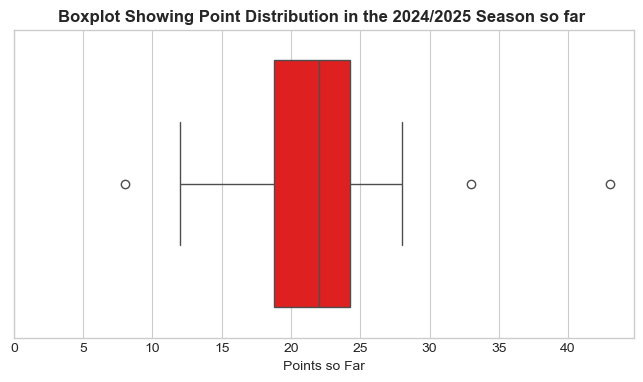

In [350]:
plt.figure(figsize=(8, 4))
plt.style.use('seaborn-v0_8-whitegrid')
sns.boxplot(dfr, x = 'Points', color = 'red', showfliers = 'True')
plt.title('Boxplot Showing Point Distribution in the 2024/2025 Season so far ', weight='bold')
plt.xlabel('Points so Far')
plt.xlim(0, )
plt.savefig('output/URC_Points_Boxplot.png')
plt.show()

In [290]:
# Checking Media
med = np.median(dfr['Points'])
med

22.0

In [295]:
#Determining the Interquartile Range
q1 = dfr['Points'].quantile(0.25)
q3 = dfr['Points'].quantile(0.75)
iqr = q3-q1
iqr

5.5

In [297]:
df2 = dfr.copy()
df2.head()

,Team,Played,Won,Lost,Drawn,For,Against,Bonus,Points,Position
0,Leinster,9,9,0,0,260,111,7,43,1
1,Glasgow Warriors,9,6,3,0,255,153,9,33,2
2,Cardiff Rugby,9,5,3,1,198,213,6,28,3
3,Bulls,7,5,2,0,182,128,5,25,4
4,Sharks,8,5,3,0,203,208,4,24,5


We shall divide the teams into different ranks based on their current position
the ranks we will use are:
1. Top 4: These are the top 4 teams currentlt in the league
2. Mid Teams: These are the middle teams in the league (between position 5 and 12)
3. Bottom Teams = These are the bottom 4 teams in the league.

In [298]:
df2['Rank'] = pd.cut(df2['Position'],
               bins = [0, 4, 12, 16],
               labels = ['Top 4', 'Mid team', 'Bottom 4'])
df2.head()

,Team,Played,Won,Lost,Drawn,For,Against,Bonus,Points,Position,Rank
0,Leinster,9,9,0,0,260,111,7,43,1,Top 4
1,Glasgow Warriors,9,6,3,0,255,153,9,33,2,Top 4
2,Cardiff Rugby,9,5,3,1,198,213,6,28,3,Top 4
3,Bulls,7,5,2,0,182,128,5,25,4,Top 4
4,Sharks,8,5,3,0,203,208,4,24,5,Mid team


In [302]:
# Get the Mean of teams based on their rank
rank_mean = df2.groupby('Rank', as_index=False, observed=True)['Points'].mean()
rank_mean

,Rank,Points
0,Top 4,32.250
1,Mid team,21.875
2,Bottom 4,13.750


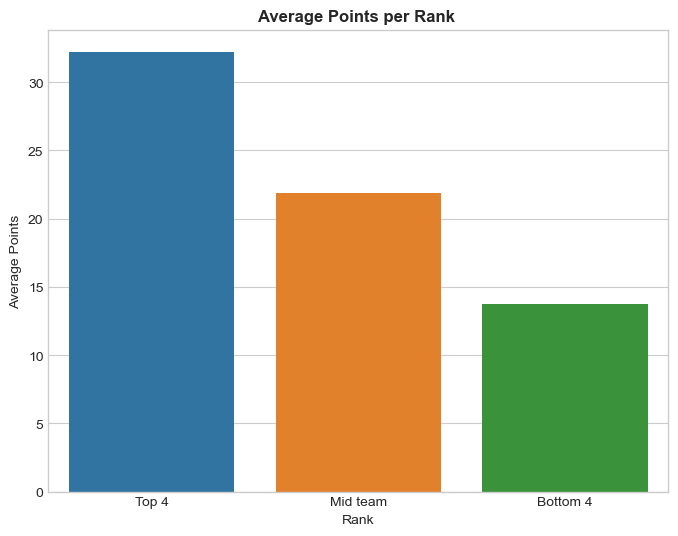

In [351]:
#plot the means
plt.figure(figsize = (8, 6))
sns.barplot(rank_mean, x = 'Rank', y='Points', hue='Rank')
plt.title('Average Points per Rank ', weight='bold')
plt.ylabel('Average Points')
plt.xlabel('Rank')
plt.savefig('output/Mean_Points_per_Rank.png')
plt.show()

The Championship includes teams in the Northern and Southern Hemispere, therefore we shall try find the understand the distribution of teams based on country and hemisphere in the Championship
* The Northern includes teams in Europe.
* The Southern Hemisphere includes teams in South Africa

In [309]:
df2['Team']

0             Leinster
1     Glasgow Warriors
2        Cardiff Rugby
3                Bulls
4               Sharks
5             Scarlets
6             Benetton
7            Edinburgh
8               Ulster
9             Stormers
10             Munster
11               Lions
12            Connacht
13             Ospreys
14               Zebre
15             Dragons
Name: Team, dtype: object

In [310]:
hemisphere = ['Northern', 
              'Northern', 
              'Northern', 
              'Southern', 
              'Southern', 
              'Northern', 
              'Northern', 
              'Northern', 
              'Northern',
              'Southern', 
              'Northern', 
              'Southern', 
              'Northern', 
              'Northern', 
              'Northern', 
              'Northern',
             ]
countries = ['Ireland', 'Scotland', 'Wales', 'South Africa', 'South Africa', 'Wales', 'Italy', 'Scotland', 'Ireland','South Africa', 'Ireland', 'South Africa', 'Ireland', 'Wales', 'Italy', 'Wales']

In [311]:
df2['Hemisphere'] = hemisphere
df2['Country'] = countries

In [312]:
df2.head()

,Team,Played,Won,Lost,Drawn,For,Against,Bonus,Points,Position,Rank,Hemisphere,Country
0,Leinster,9,9,0,0,260,111,7,43,1,Top 4,Northern,Ireland
1,Glasgow Warriors,9,6,3,0,255,153,9,33,2,Top 4,Northern,Scotland
2,Cardiff Rugby,9,5,3,1,198,213,6,28,3,Top 4,Northern,Wales
3,Bulls,7,5,2,0,182,128,5,25,4,Top 4,Southern,South Africa
4,Sharks,8,5,3,0,203,208,4,24,5,Mid team,Southern,South Africa


In [315]:
country = df2['Country'].value_counts()

In [316]:
country

Country
Ireland         4
Wales           4
South Africa    4
Scotland        2
Italy           2
Name: count, dtype: int64

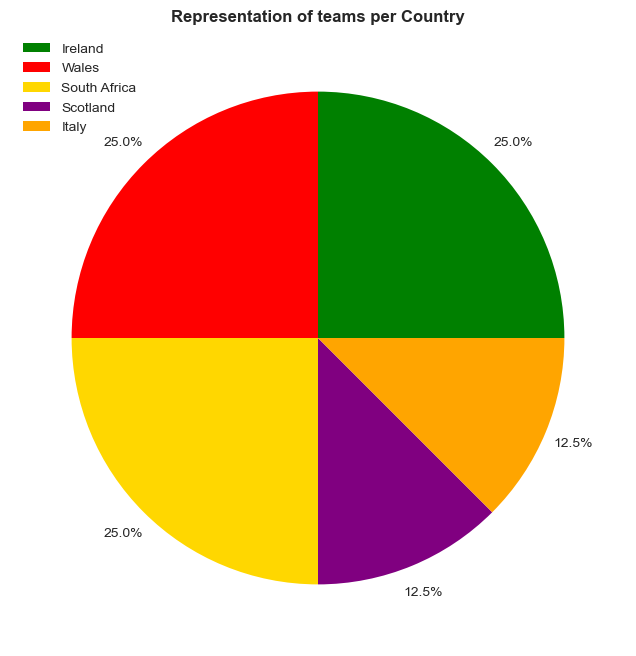

In [352]:
plt.figure(figsize = (10, 8))
plt.pie(country.values, labels = None, colors = ['green', 'red', 'gold', 'purple', 'orange'], autopct='%1.1f%%', pctdistance=1.12 )
plt.legend(labels = country.index, loc='upper left')
plt.title('Representation of teams per Country', weight='bold')
plt.savefig('output/team_rep_per_country.png')
plt.show()

#### Bonus Mapping out the Teams' Stadiums 

As a bonus we will try mapping out the location of each team's stadium

We shall aggregate them in clusters to visualize the number of teams per hemisphere and country as we zoom in

In [331]:
#Map out Stadiums
df2['Team']

0             Leinster
1     Glasgow Warriors
2        Cardiff Rugby
3                Bulls
4               Sharks
5             Scarlets
6             Benetton
7            Edinburgh
8               Ulster
9             Stormers
10             Munster
11               Lions
12            Connacht
13             Ospreys
14               Zebre
15             Dragons
Name: Team, dtype: object

In [332]:
stadium = ['RDS Arena Aviva Stadium Energia Park', 'SCOTSTOUN STADIUM', 'CARDIFF ARMS PARK', 'LOFTUS VERSFELD', 'HOLLYWOODBETS KINGS PARK',  'PARC Y SCARLETS',
          'STADIO COMUNALE DI MONIGO', 'HIVE STADIUM', 'KINGSPAN STADIUM', 'DHL STADIUM', 'VIRGIN MEDIA PARK THOMOND PARK', 'EMIRATES AIRLINE PARK',
          'DEXCOM STADIUM', 'SWANSEA.COM STADIUM', 'STADIO SERGIO LANFRANCHI', 'RODNEY PARADE']
lat = [53.335278, 55.88172, 51.47861, -25.75333, -29.8215967136, 51.67416397, 45.6803, 55.941667, 54.572664376, -33.9689777907, 52.673306, -26.1918442326, 53.279, 51.6422, 44.825, 51.588333 ]
long = [-6.228333, -4.34243, -3.18250,  28.22278, 31.0244799021, -4.12416617, 12.2132, -3.244167, -5.902829722, 18.4677981288, -8.642367, 28.0564597742, -9.0397, -3.9351, 10.333056, -2.987778]

In [333]:
df2['Stadium'] = stadium
df2['Latitude'] = lat
df2['Longitude'] = long

In [334]:
df2.head()

,Team,Played,Won,Lost,Drawn,For,Against,Bonus,Points,Position,Rank,Hemisphere,Country,Stadium,Latitude,Longitude
0,Leinster,9,9,0,0,260,111,7,43,1,Top 4,Northern,Ireland,RDS Arena Aviva Stadium Energia Park,53.335278,-6.228333
1,Glasgow Warriors,9,6,3,0,255,153,9,33,2,Top 4,Northern,Scotland,SCOTSTOUN STADIUM,55.881720,-4.342430
2,Cardiff Rugby,9,5,3,1,198,213,6,28,3,Top 4,Northern,Wales,CARDIFF ARMS PARK,51.478610,-3.182500
3,Bulls,7,5,2,0,182,128,5,25,4,Top 4,Southern,South Africa,LOFTUS VERSFELD,-25.753330,28.222780
4,Sharks,8,5,3,0,203,208,4,24,5,Mid team,Southern,South Africa,HOLLYWOODBETS KINGS PARK,-29.821597,31.024480


In [335]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Team        16 non-null     object  
 1   Played      16 non-null     int32   
 2   Won         16 non-null     int32   
 3   Lost        16 non-null     int32   
 4   Drawn       16 non-null     int32   
 5   For         16 non-null     int32   
 6   Against     16 non-null     int32   
 7   Bonus       16 non-null     int32   
 8   Points      16 non-null     int32   
 9   Position    16 non-null     int64   
 10  Rank        16 non-null     category
 11  Hemisphere  16 non-null     object  
 12  Country     16 non-null     object  
 13  Stadium     16 non-null     object  
 14  Latitude    16 non-null     float64 
 15  Longitude   16 non-null     float64 
dtypes: category(1), float64(2), int32(8), int64(1), object(4)
memory usage: 1.6+ KB


In [336]:
import folium

In [338]:
latitude = 53.335278	
longitude = -6.228333

In [344]:
from folium import plugins

# Let's start again with a clean copy of the map
stad_map = folium.Map(location = [latitude, longitude], zoom_start = 2)

# instantiate a mark cluster object for the incidents in the dataframe
stadiums = plugins.MarkerCluster().add_to(stad_map)

# Loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, team in zip(df2.Latitude, df2.Longitude, df2.Stadium, df2.Team):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label + '\n' + 'Team: ' + team,
        tooltip = label
    ).add_to(stadiums)

stad_map

We shall then save our map as a html file to open in a web browser.

In [345]:
stad_map.save('output/stadiums.html')